In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
import tkinter as tk
from tkinter import filedialog
import itertools
from colour import Color
from datetime import date
import scikit_posthocs as sp

In [2]:
today = date.today()
print("Today's date:", today)
date = str(today)
date

Today's date: 2023-07-04


'2023-07-04'

In [3]:
tubulin = '[Tubulin] ' r'$(\mu M)$'
tub = 'tub'
DCXconc = '[DCX] ' r'$(n M)$'
DCX = 'DCX'


Concentration = 'Concentration ' r'$(\mu M)$'
Length = 'Length ' r'$(\mu m)$'
Lifetime = 'Lifetime ' r'$(min)$'
GrowthRate = 'Growth Rate ' r'$(\mu m / min)$'
TimeToNucleate = 'Time to Nucleate ' r'$(min)$'
ShrinkageLength = 'Shrink Length ' r'$(\mu m)$'
ShrinkageLifetime = 'Shrink Lifetime ' r'$(min)$'
ShrinkageRate = 'Shrink Rate ' r'$(\mu m / min)$'

Expt = 'Expt'

In [4]:
black = '#000000'
grey = '#777777'
blue = '#23459C'
cyan = '#0089CF'
green = '#79BA1A'
purple = '#AB4A9C'
lily = '#CB81EA'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
darkorange = '#FF5B00'
lightorange = '#FFAC83'
yellow = '#FFCB05'
lightyellow = '#F9DC2D'
pink = '#FFA4CD'

StartHue1 = Color(purple)
tub1color = list(StartHue1.range_to(Color(pink),3))
StartHue2 = Color(darkorange)
tub2color = list(StartHue2.range_to(Color(lightorange),3))
print(tub1color,tub2color)

palette = [grey,cyan] + list(map(Color.get_hex,tub1color)) + list(map(Color.get_hex,tub2color)) + [green]
parameters = [GrowthRate,Length,Lifetime,ShrinkageRate]

[<Color #ab4a9c>, <Color #e468b8>, <Color #ffa4cd>] [<Color #ff5b00>, <Color #ff8341>, <Color #ffac83>]


## Join Data

In [5]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)

In [6]:
files = [x for x in path.iterdir() if x.is_file()]
files = [i for i in files if (str(i)[-10:] != 'results.csv') == True]
files = [i for i in files if (str(i)[-3:] == 'csv') == True]
files

[WindowsPath('C:/Users/Brouhard Lab/Data/Results_Files/Mutant aggregation/Data_Sheets/2023-07-03_resultsP191.csv'),
 WindowsPath('C:/Users/Brouhard Lab/Data/Results_Files/Mutant aggregation/Data_Sheets/2023-07-03_resultsR76.csv'),
 WindowsPath('C:/Users/Brouhard Lab/Data/Results_Files/Mutant aggregation/Data_Sheets/2023-07-03_resultstub.csv'),
 WindowsPath('C:/Users/Brouhard Lab/Data/Results_Files/Mutant aggregation/Data_Sheets/2023-07-03_resultsWT.csv')]

In [7]:
data = pd.read_csv(files[0], encoding='utf-8')
for i in range(1,len(files)):
    d = pd.read_csv(files[i], encoding='utf-8')
    data = pd.concat([data,d])


In [8]:
data

,Rep,Date,Investigator,Ch,[Tubulin] $(\mu M)$,[DCX] $(n M)$,[EB] $(n M)$,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$,Rescues,DCX Type,Reps
0,1.0,2023-04-28,Brandi,1,8,60,0,7.8645,9.203333,0.854527,1.422333,8.1855,0.041833,195.669323,False,P191R,NaN
1,1.0,2023-04-28,Brandi,1,8,60,0,12.5190,23.677667,0.528726,0.460167,12.7330,0.083667,152.187251,False,P191R,NaN
2,5.0,2023-06-02,Brandi,3,8,60,0,5.9385,6.065833,0.979008,9.872667,6.0455,0.041833,144.513944,False,P191R,NaN
3,6.0,2023-06-19,Brandi,3,8,60,0,11.1280,12.801000,0.869307,3.639500,11.0210,0.083667,131.725100,False,P191R,NaN
4,7.0,2023-06-20,Brandi,1,8,60,0,20.7580,17.821000,1.164806,3.193278,20.7580,0.167333,124.051793,False,P191R,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,6.0,2023-05-16,Brandi,3,8,60,0,6.2060,9.287000,0.668246,0.386958,6.2060,0.836667,7.417530,False,WT,NaN
296,6.0,2023-05-16,Brandi,3,8,60,0,8.2390,9.370667,0.879233,2.060292,8.7740,1.087667,8.066810,True,WT,NaN
297,6.0,2023-05-16,Brandi,3,8,60,0,13.6960,16.147667,0.848172,1.892958,14.5520,1.757000,8.282299,True,WT,NaN
298,6.0,2023-05-16,Brandi,3,8,60,0,14.3380,18.155667,0.789726,0.470625,14.5520,1.673333,8.696414,False,WT,NaN


In [9]:
data.to_csv(path/(date+'_MasterSheet.csv'), encoding='utf-8', index=False)

## Open Master Data

In [19]:
askmastersheet = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file
data = pd.read_csv(askmastersheet, encoding='utf-8')

In [20]:
pathmastersheet = Path(askmastersheet)
resultdirectory = str(pathmastersheet.parents[0])+'//Plots'
newmydir = Path(resultdirectory)
newmydir.mkdir(exist_ok=True)
path = newmydir
path

WindowsPath('C:/Users/Brouhard Lab/Data/Results_Files/DCX_EB_Dynamics/IRM/Master/Plots')

In [21]:
data

,Date,Investigator,Ch,[Tubulin] $(\mu M)$,[DCX] $(n M)$,[EB] $(n M)$,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$,Rescues,DCX Type
0,2022-12-19,Brandi,1,6.0,0.0,0.0,0.6955,5.898500,0.117911,5.424389,1.0700,0.251000,4.262948,False,None
1,2022-12-19,Brandi,1,6.0,0.0,0.0,0.8560,6.275000,0.136414,18.769222,1.0700,0.251000,4.262948,False,None
2,2022-12-19,Brandi,1,6.0,0.0,0.0,0.8560,2.761000,0.310033,6.804889,0.8560,0.167333,5.115538,False,None
3,2022-12-19,Brandi,1,6.0,0.0,0.0,1.0700,2.677333,0.399651,3.374556,1.0700,0.167333,6.394422,False,None
4,2022-12-19,Brandi,1,6.0,0.0,0.0,0.7490,2.259000,0.331563,10.486222,0.8560,0.083667,10.231076,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,2023-05-12,Brandi,1,8.0,60.0,20.0,2.0865,2.133500,0.977970,4.085722,2.3005,0.041833,54.992032,False,WT
1729,2023-05-12,Brandi,1,8.0,60.0,20.0,1.3910,0.962167,1.445695,0.697222,1.3375,0.167333,7.993028,False,WT
1730,2023-05-12,Brandi,1,8.0,60.0,20.0,1.6585,1.506000,1.101262,1.868556,1.7120,0.041833,40.924303,False,WT
1731,2023-05-12,Brandi,1,8.0,60.0,20.0,1.6050,1.506000,1.065737,0.529889,1.4980,NaN,NaN,False,WT


## Seaborn Plot

NameError: name 'EBconc' is not defined

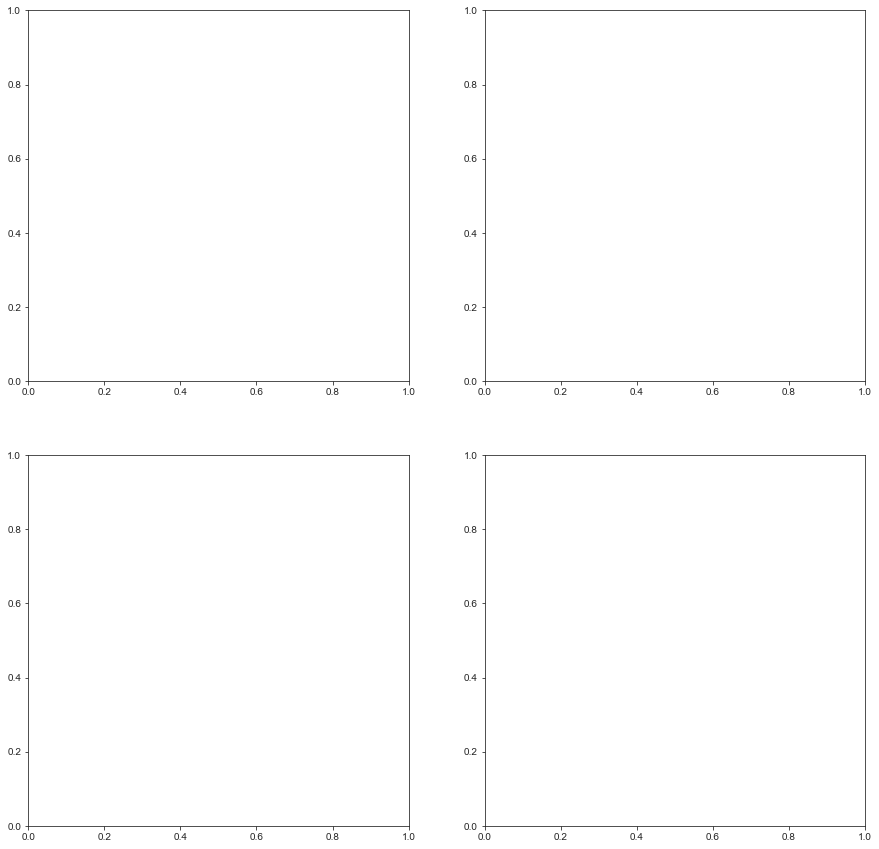

In [27]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.pointplot(x=EBconc, y=parameters[c],
                         hue=Type, dodge=True,
                      err_style="bars", marker='o', join=False, capsize=.1,
                        data=data[(data[tubulin]==8)],err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[i][j]).set(title='08uM tubulin')
        axs[i][j].legend(loc='center').set(title=Type)
        c += 1
        
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

plt.tight_layout()
plt.savefig(path/('tub8uM_DCX-variable'+date+'.pdf'))
plt.savefig(path/('tub8uM_DCX-variable'+date+'.png'))

## Data Fit

In [20]:
def gaussian(x, mu, sig):
    return (np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) )/(sig*np.sqrt(2*np.pi))

# def exponential(x, scale):
#     return ((np.exp(-x/scale) )/(scale))

# def gamma(x, shape, scale):
#     return (np.power(x,shape-1)*np.exp(-x/ scale))/(sp.special.gamma(shape) * np.power(scale,shape))

In [71]:
def make_hist(data, c, r) :
    
    selectdata = data[(data[tubulin]==r)]
    
    # if c == GrowthRate :
    maxbin = 1.5
    binsize = 0.05
#     elif parameter == ShrinkageRate :
#         maxbin = 15
#         binsize = 0.1
    # else:
    #     maxbin = 30
    #     binsize = 1
        
    n, bins, patches = plt.hist(selectdata[c], bins=np.arange(0, maxbin + binsize, binsize), density=True);
    plt.clf()
       
    return n, bins

In [89]:
def equation_fit(data, c):
    
    # if (c ==  GrowthRate) :
    equation = gaussian
        
    results = pd.DataFrame(columns=[] , index=[])
    
    for r in data[tubulin].unique(): #creating a histogram of data assigned to each unique x-value! This is how to create a separate mean for each group/bin!

        n, bins =  make_hist(data, c, r)      
        if np.isnan(np.sum(n)) == True:
                continue

#         if equation == gamma :
#             coeff, var_matrix = sp.optimize.curve_fit(equation,bins[:-1],n,[2,1])
#         else :
        coeff, var_matrix = sp.optimize.curve_fit(equation,bins[:-1],n)

        variance = np.diagonal(var_matrix) #Refer [3]
        SE = np.sqrt(variance) #Refer [4]

            #======Making a data frame========
        results0 = pd.DataFrame(columns=[] , index=[])
        for k in np.arange(0,len(coeff)):
            header = [np.array([c]),np.array(['Coefficient '+ str(k)])]
            r0 = pd.DataFrame([coeff[k],SE[k]], index=(['Value','SE']),columns= header)
            results0 = pd.concat([results0, r0], axis=1, sort=False)

        results0[tubulin] = r
            

        results = pd.concat([results, results0], sort=False)

    return results

In [90]:
# newmydir = path/(date+'_fitdata')
# newmydir.mkdir(exist_ok=True)
# newmydir

In [91]:
GrowthRateFit = equation_fit(data, GrowthRate)

C:\Users\Brandi\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


<Figure size 432x288 with 0 Axes>

In [92]:
GrowthRateFit = GrowthRateFit.rename(columns={'Coefficient 0': 'Mean'})

ResultFit = pd.concat([GrowthRateFit], axis=1, sort=False)
ResultFit = ResultFit.loc[:,~ResultFit.columns.duplicated()]

ResultFit.to_csv(newmydir/('ResultFit_'+date+'.csv'), encoding='utf-8', index=False)
ResultFit

Growth Rate $(\mu m / min)$               [Tubulin] $(\mu M)$
                             Mean Coefficient 1                    
Value                    0.357493      0.091165                 6.0
SE                       0.004694      0.003832                 6.0
Value                    0.589003      0.101259                 8.0
SE                       0.003425      0.002797                 8.0
Value                    0.798786      0.100524                10.0
SE                       0.010161      0.008296                10.0
Value                    1.052251      0.171797                12.0
SE                       0.017078      0.014004                12.0

## Data Plotting

In [14]:
data[Expt]

0         Tubulin
1         Tubulin
2         Tubulin
3         Tubulin
4         Tubulin
          ...    
520    DCX-WT+EB3
521    DCX-WT+EB3
522    DCX-WT+EB3
523    DCX-WT+EB3
524    DCX-WT+EB3
Name: Expt, Length: 525, dtype: object

In [15]:
untub=data[Expt].unique()
untub

array(['Tubulin', 'Tub+EB3', 'DCX-P191R', 'DCX-P191R+EB3', 'DCX-R76S',
       'DCX-R76S+EB3', 'DCX-WT', 'DCX-WT+EB3'], dtype=object)

In [16]:
ymean=data.groupby(Expt).count()
ymean


,Date,Investigator,Ch,[Tubulin] $(\mu M)$,[DCX] $(n M)$,[EB] $(n M)$,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$,Rescues,DCX Type
Expt,,,,,,,,,,,,,,,
DCX-P191R,71,71,71,71,71,71,71,71,71,71,71,70,70,71,71
DCX-P191R+EB3,78,78,78,78,78,78,78,78,78,78,78,75,75,78,78
DCX-R76S,137,137,137,137,137,137,137,137,137,137,137,127,127,137,137
DCX-R76S+EB3,55,55,55,55,55,55,55,55,55,55,55,48,48,55,55
DCX-WT,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61
DCX-WT+EB3,56,56,56,56,56,56,56,56,56,56,56,54,54,56,56
Tub+EB3,33,33,33,33,33,33,33,33,33,33,33,30,30,33,33
Tubulin,34,34,34,34,34,34,34,34,34,34,34,33,33,34,34


In [194]:
ystd=data.groupby(tubulin).std()
ystd

,Ch,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$
[Tubulin] $(\mu M)$,,,,,,,,
6.0,1.128704,1.348780,3.745317,0.099268,5.944081,1.349259,0.134217,9.511765
8.0,1.184976,3.252343,5.101516,0.108193,7.578300,3.252615,0.257820,10.417108
10.0,0.386459,5.409052,6.165307,0.123256,7.857857,5.479488,0.287805,9.797352
12.0,0.874094,7.705022,7.245940,0.169727,6.807545,8.111247,0.479928,12.600540


In [220]:
ymean['Growth Rate $(\mu m / min)$']

[Tubulin] $(\mu M)$
6.0     0.403111
8.0     0.623198
10.0    0.842666
12.0    1.098787
Name: Growth Rate $(\mu m / min)$, dtype: float64

ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

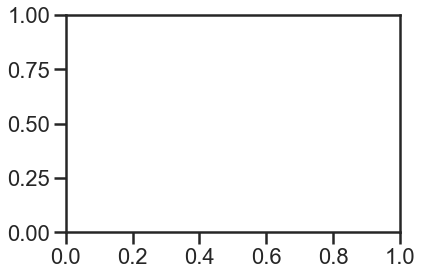

In [222]:

plt.plot(x=tubulin,y,'o')


In [1]:
#data dump into a plot w/ best fit line - need to add equation

ax = sns.lmplot(x=tubulin, y='Growth Rate $(\mu m / min)$', truncate=False, scatter_kws={"s": 12,"alpha":0.3}, aspect=1, data=data, fit_reg=True, markers='o', x_jitter=.2, palette=sns.color_palette(palette))

#note: change to truncate=True if you don't want the regression line to go across the whole plot and just where you have data

sns.despine(left=False)
sns.set_style("whitegrid")

sns.set_style("ticks")
plt.rcParams['axes.linewidth'] = 2.5

plt.xlabel('[Tubulin] $(\mu M)$', fontsize=20)
plt.ylabel('Growth Rate $(\mu m/min)$', fontsize=20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize =20)
plt.ylim(0,2)
plt.tight_layout()

plt.savefig(newmydir/('Growth Rate'+date+'.pdf'))

plt.show()

NameError: name 'sns' is not defined

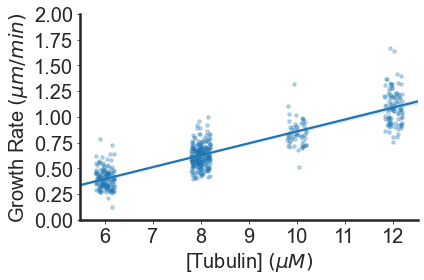

In [29]:
#regplot

ax = sns.regplot(x=tubulin, y='Growth Rate $(\mu m / min)$', truncate=False, scatter_kws={"s": 12,"alpha":0.3}, data=data, fit_reg=True, x_jitter=.2)

#note: change to truncate=True if you don't want the regression line to go across the whole plot and just where you have data

sns.despine(left=False)
sns.set_style("whitegrid")

sns.set_style("ticks")
plt.rcParams['axes.linewidth'] = 2.5

plt.xlabel('[Tubulin] $(\mu M)$', fontsize=20)
plt.ylabel('Growth Rate $(\mu m/min)$', fontsize=20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize =20)
plt.ylim(0,2)
plt.tight_layout()

plt.savefig(newmydir/('Growth Rate'+date+'.pdf'))

plt.show()

## Making a DataFrame

In [ ]:
df=data[tubulin,GR

NameError: name 'data' is not defined

NameError: name 'curve_fit' is not defined

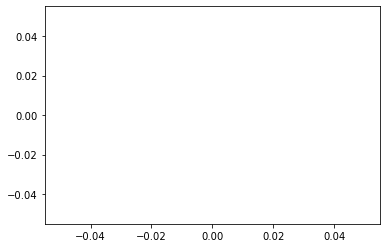

In [15]:
# plot data
df = data[data[tubulin]==GrowthRate]

plt.scatter(df[tubulin].values,df['Growth Rate $(\mu m / min)$'].values, label="data")

# Fitting
model = lambda x, A, x0, sigma, offset:  offset+A*np.exp(-((x-x0)/sigma)**2)
popt, pcov = curve_fit(model, df[tubulin].values, 
                              df['Growth Rate $(\mu m / min)$'].values, p0=[1,0,2,0])
#plot fit
x = np.linspace(df[tubulin].values.min(),df[tubulin].values.max(),250)
pt.plot(x,model(x,*popt), label="fit")

# Fitting
model2 = lambda x, sigma:  model(x,1,0,sigma,0)
popt2, pcov2 = curve_fit(model2, df[tubulin].values, 
                              df['Growth Rate $(\mu m / min)$'].values, p0=[2])


#pt.xlim(None,10)
plt.legend()
plt.show()

In [16]:
data['Growth Rate $(\mu m / min)$'].mean()

0.6726867410813716

In [108]:
def rescue_count(data):
    
    results = pd.DataFrame(columns=[] , index=[])
    
    data.loc[pd.isnull(data[GrowthRate]), ['Rescues']] = np.NaN
    
    for tubconc in data[tubulin].unique():
        
        for dcxconc in data[DCXconc].unique():
                
                selectdata = data[(data[tubulin]==tubconc)&(data[DCXconc]==dcxconc)]
                n =  selectdata['Rescues'].count()
                
                if n == 0:
                    continue
                    
                rv = selectdata['Rescues'].dropna().value_counts(normalize = True).to_frame()
                rescue_values = 1-rv.loc[0][0]
                

            #======Making a data frame========
                r0 = {tubulin:[tubconc], DCXconc:[dcxconc], 'Normalized Rescue': [rescue_values],
                     'n': [n]}
                results0 = pd.DataFrame(data=r0)
                results = pd.concat([results, results0], sort=False)

    return results

In [109]:
rescues = rescue_count(data)
rescues

,[Tubulin] $(\mu M)$,[DCX] $(n M)$,Normalized Rescue,n
0,6,0,0.000000,30
0,6,5,0.138889,36
0,6,15,0.171429,35
0,6,50,0.916667,12
0,6,200,0.916667,12


In [110]:
rescue=rescues.reset_index(drop=True) # drops the '0' column and resets index, but must be made into a new dataframe to save the change!

In [111]:
rescue['Normalized Rescue']

0    0.000000
1    0.138889
2    0.171429
3    0.916667
4    0.916667
Name: Normalized Rescue, dtype: float64

In [112]:
rescue[DCXconc]

0      0
1      5
2     15
3     50
4    200
Name: [DCX] $(n M)$, dtype: int64

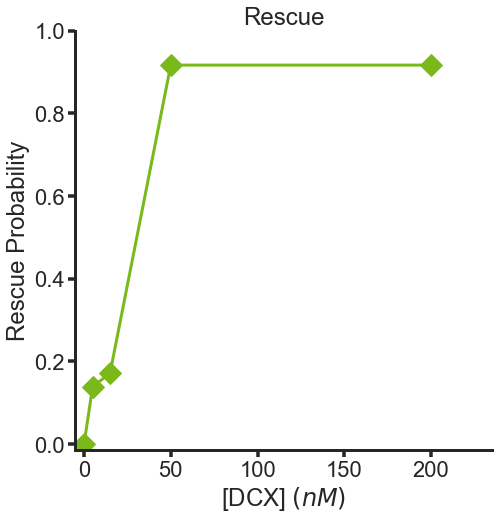

In [114]:
scattersize = 12
cap = 5

fig, ax = plt.subplots(1,1,figsize=(7.45,7.75))
#     plt.suptitle('Fitted pooled data', fontsize=30)

x = rescue[DCXconc]
y = rescue['Normalized Rescue']

ax.plot(x, y, color=green, marker='D', ms=15)
   

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)
ax.set_ylim(-0.015,1)
ax.set_xlim(-5,235)
ax.set_xlabel( DCXconc)




ax.set_title('Rescue')
ax.set_ylabel('Rescue Probability')


#ax.legend((Type_order),loc='upper left',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')
plt.tight_layout()
plt.savefig(newmydir/('joint_graphsRescues.jpg'))